(sec-binary-drawing)=
# Binäres Zeichnen

````{admonition} Lernziel
:class: learngoals

In diesem Abschnitt werden wir das was wir im Abschnitt [Interpretation](sec-interpretation) und [Repräsentation](sec-representation) besprochen hatten konkretisieren.
Wir werden eine bestimmte Interpretation nutzten um aus einer Folge von 0 und 1 Bilder 

```{figure} ../../figs/image-representation/zero-and-one-to-bw-picture.png
---
width: 200px
name: fig-zero-and-one-to-bw-picture
---
```

und Animationen zu generieren.

```{figure} ../../figs/image-representation/flower.gif
---
width: 200px
name: fig-flower
---
```

Sie werden lernen wie [Informationen](sec-information) erst durch einen [Interpreter](def-interpreter) eine bestimmte Bedeutung erlangen.
Sie werden den Umgang mit mehrdimensionalen ``Python``-[Listen](sec-list) und [Tupeln](sec-tuple) erlernen.
Außerdem werden Sie durch die Konstruktion einer eignen Interpretation in eine abstraktere Welt gelangen und sich in dieser austoben.
Im Zuge dessen werden Sie Probleme in viele Teilprobleme aufteilen (**Dekomposition**).
Sie werden Ihre **Mustererkennung** benötigen und auch **mathematisches Denken** praktizieren.
````

## Interpretation

Wir beginnen mit einem Schwarz-Weiß-Rasterbild.
In anderen Worten: Lassen Sie uns unsere eigene Interpretation konstruieren.

Wir orientieren uns an dem sog. [Rasterbild](pixel-image).
Es hat eine bestimmte Anzahl an Pixel in $x$ und $y$-Richtung.
Die Anzahl $n$ in $x$-Richtung bezeichnen wir als Spalten und die Anzahl $m$ in $y$-Richtung bezeichnen wir als Zeilen.
Wir wollen lediglich Schwarz-Weiß-Bilder zeichnen können, deshalb benötigen wir nur zwei mögliche Zustände je Pixel.
Wir *modellieren* dies mit 0 (schwarz) und 1 (weiß).
Das Bild kann als $m \times n$-Matrix $B$ mit $B \in \mathbb{B}^{m \times n}$ aufgefasst werden.

```{exercise} Bits pro Pixel
:label: repraesentation-bw-exercise
Wie viele *Bits* benötigen Sie für jeden Pixel?
```

```{solution} repraesentation-bw-exercise
:label: repraesentation-bw-solution
:class: dropdown
Jeder Pixel kann nur einen von zwei Zuständen annehmen, demnach brauchen wir pro Pixel $1$ *Bit*.
```

Jede Zeile des Bildes repräsentieren wir als Folge von 0 und 1.
Da wir unser Bild verändern möchten, eignet sich in ``Python`` hierfür die [Liste](sec-list) ``list``.

In [1]:
row = [0, 1, 0, 1, 0, 1, 1]

Ein Bild *modellieren* wir wiederum als Liste von Zeilen (Pixelstreifen) oder eben eine *Liste von Listen*.

In [2]:
picture = [[0, 1, 0, 1, 0, 1, 1], # 1. Zeile
           [1, 1, 0, 1, 0, 1, 1], # 2. Zeile
           [0, 0, 1, 1, 1, 1, 1], # 3. Zeile
           [1, 0, 0, 1, 0, 1, 1]] # 4. Zeile

Unsere [Interpretation](sec-interpretation) erhält als Argument, d.h., als Repräsentanten eine zweidimensionale Liste aus Binärzahlen und liefert ein Schwarz-Weiß-Bild.
Den notwendigen Interpreter, der diese Interpretation realisiert, bietet uns folgende Funktion:

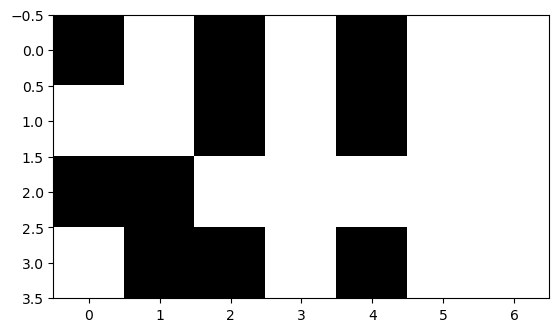

In [3]:
import matplotlib.pyplot as plt
def plot_picture(picture):
    plt.imshow(picture, cmap='gray', vmin=0, vmax=1)

plot_picture(picture)

Wir haben nun alles was wir brauchen um richtig loszulegen: Eine Interpretation in Form einer Liste von Listen und einen [Interpreter](def-interpreter) in Form der Funktion ``plot_picture``.

### Listen in Python

Bevor wir weiter fortfahren, lassen Sie uns einen wiederholten Blick auf die ``Python``-Liste werfen.
Eine ausführlichere Diskussion zu Listen finden Sie im Abschnitt [Listen](sec-list) im Teil **PYTHON**.

Der Zugriff auf einzelne Listenelemente einer zweidimensionalen Liste unterscheidet sich im Endeffekt nicht von dem der eindimensionalen Liste.
Mit

In [4]:
picture[3][5]

1

greifen wir auf die vierte Liste der Liste ``picture`` zu und in dieser auf das sechste Element.
Bedenken Sie, dass der Index einer Liste mit 0 startet.
Im Falle unseres Bildes entspricht dies dem Zugriff des sechsten Elements in der vierten Zeile.

Wenn Sie mit Listen arbeiten, ist es wichtig zu wissen wie diese im Speicher abgelegt werden, siehe Abschnitt [Listen und der Speicher](sec-list-and-memory).
Wenn wir unser Rasterbild aus Listen von Listen konstruieren müssen wir dieses Wissen mit einbeziehen.
Folgender Code erzeugt ein Bild mit zwei [identischen](def-identity) Zeilen zu erzeugen.

In [5]:
row = [0, 1, 0, 1, 0, 1, 1]
picture = [row, row]

Da die beiden Zeilen identische sind, entsteht ein merkwürdiges Phänomen, welches die folgende Aufgabe zum Vorschein bringt.

```{exercise} Kopie einer Liste
:label: copy-list-exercise
Ändern Sie einen einzelnen Pixel des eben konstruierten Bildes ``picture`` und lassen Sie sich das Ergebnis anzeigen.
Was stellen Sie fest?
```

````{solution} copy-list-exercise
:label: rcopy-list-solution
:class: dropdown
Ändern wir einen Pixel einer Zeile, z.B. durch

```python
picture[0][0] = 1
```

so ändert wir sowohl ``picture[0][0]`` als auch ``picture[1][0]``.
````

Unser Bild enthält nicht nur zwei [gleiche](def-equality) sondern zwei [identische](def-identity) Zeilen.
Die Zeile, also der Wert ``[0, 1, 0, 1, 0, 1, 1]`` wird nicht kopiert.
Stattdessen wird die Speicheradresse kopiert, sodass beide Einträge der Liste ``picture`` die gleiche Adresse enthalten:

In [6]:
print(f'Address of first row is {id(picture[0])}')
print(f'Address of second row is {id(picture[1])}')

Address of first row is 4825794944
Address of second row is 4825794944


Um das gewünschte Ergebnis zu erzielen, müssen wir den Wert der Liste ``row`` und nicht deren Adresse kopieren.
In anderen Worten: Wir müssen eine *tiefe* und keine *flache Kopie* anlegen, siehe Abschnitt [Tiefe und flache Kopie](sec-copy-of-ds).
Hierzu bietet uns ``Python`` die Listen-Methode ``copy()`` an:

In [7]:
row = [0, 1, 0, 1, 0, 1, 1]
picture = [row.copy(), row.copy()]

Da nun alle Listenelemente in ``row`` kopiert werden, können Sie sicher sein, dass Änderungen der Listenelemente nur jene eine Liste betreffen.
Bedenken Sie jedoch, dass ``copy`` nicht zwangsläufig eine *tiefe Kopie* erzeugt.
Es kopiert lediglich die Elemente einer Liste indem deren Adressen kopiert werden.
Ist Ihre Liste eine mehrdimensionale Liste, laufen Sie in das gleiche Problem:

In [8]:
row = [0, 1, 0, 1, 0, 1, 1]
picture = [row.copy(), row.copy()]
picture_copy = picture.copy()
picture_copy[0][0] = 1

print(picture[0][0])
print(picture_copy[0][0])

1
1


```{admonition} Tiefe Kopie in Python
:class: remark
:name: remark-deep-copy-python

Verwenden Sie die Funktion ``deepcopy`` des Moduls ``copy`` um eine *tiefe Kopie* in ``Python`` zu erzeugen.
```

Um Listen zu verketten, können Sie in ``Python`` den ``+``-Operator verwenden.

In [9]:
[1,2,3,4] + [5,6,7,8]

[1, 2, 3, 4, 5, 6, 7, 8]

Das Ergebnis ist eine neue eindimensionale Liste die alle Elemente der beiden Listen in genau jener Reihenfolge enthält.
Allerdings unterscheidet ``Python`` zwischen 

```python
mylist += other_list
```

und

```python
mylist = mylist + other_list
```

Ersteres, also ``+=``, führt eine [veränderbare](def-mutable) (engl. *mutable*) Konkatenation durch, d.h. hier wird ``mylist`` verändert.
Letzteres, also ``mylist + other_list``, führt eine [unveränderbare](def-mutable) (engl. *immutable*) Konkatenation durch, wodurch eine Kopie erzeugt wird. D.h. ``mylist = mylist + other_list`` erzeugt eine völlig neue Liste und ordnet es ``mylist`` zu.

Sie mögen nun denken, dass Ergebnis ist doch identisch?
Sehen wir uns folgenden Code an:

In [10]:
def concat_immutable(list1,list2):
    concat = list1 + list2
    return concat

def concat_mutable(list1,list2):
    list1 += list2
    return list1

a = [1,2,3,4]
b = [5,6,7,8]
c = concat_immutable(a,b)
print(f'a = {a}')
print(f'b = {b}')
print(f'c = {c}')

c = concat_mutable(a,b)
print(f'a = {a}')
print(f'b = {b}')
print(f'c = {c}')

a = [1, 2, 3, 4]
b = [5, 6, 7, 8]
c = [1, 2, 3, 4, 5, 6, 7, 8]
a = [1, 2, 3, 4, 5, 6, 7, 8]
b = [5, 6, 7, 8]
c = [1, 2, 3, 4, 5, 6, 7, 8]


``concat_mutable`` verändert ``list1`` und da es sich nicht um einen [primitiven Datentyp](def-primitive-datatypes) handelt, wird nur die Referenz kopiert und nicht die Liste ``a`` selbst.
Somit wird ``a += b`` ausgeführt und ``a`` wird verändert.
Dies bezeichnen wir als sogenannten [Seiteneffekt](def-side-effect) und in diesem Fall ist es ein *unerwarteter Seiteneffekt*, den wir vermeiden sollten!
Dennoch ist ``+=`` immer dann sehr sinnvoll wenn Sie eine Liste sukzessive füllen wollen.
Denn jedes Mal die gesamte Liste zu kopieren kann zu einer langen Laufzeit führen.


````{exercise} Immutable vs. Mutable
:label: mutable-vs-immutable-concat
Welcher der beiden Funktionen wird bei gleicher Eingabe in kürzerer Zeit ablaufen und warum?
Testen Sie beide Versionen für große ``n`` > 0.

```python
def my_range_mutable(n):
    number = []
    for i in range(n):
        number += [i]
    return number

def my_range_immutable(n):
    number = []
    for i in range(n):
        number = number + [i]
    return number
````

Um über die Elemente einer Liste zu *iterieren*, verwendet man in ``Python`` die ``for``-[Schleife](sec-for) und wie immer bestimmt die [Einrückung](https://www.python-kurs.eu/python3_bloecke.php) die Strukturierung (``Python`` verzichtet auf Klammern):

In [11]:
for row in picture:
    print(row)

[1, 1, 0, 1, 0, 1, 1]
[0, 1, 0, 1, 0, 1, 1]


```{exercise} Iteration
:label: iteration-exercise
Schreiben Sie einen Code der jedes Pixel des Bildes einzeln durch ``print()`` ausgibt.
```

In [12]:
for row in picture:
    for pixel in row:
        print(pixel)

1
1
0
1
0
1
1
0
1
0
1
0
1
1


(sec-python-function)=
### Funktionen in Python

[Funktionen](sec-functions) definieren wir mit dem Schlüsselwort ``def`` gefolgt vom Funktionsnamen und den [Parametern](def-parameter)  der Funktion sowie ihrer Logik.
Die Werte, die diese *Parameter* beim Funktionsaufruf annehmen, nennen wir *Argumente*.

Falls Sie mit Ihrer Funktion einen Wert, eine Liste, oder ein anderes Objekt zurückgeben möchten nutzen Sie das ``return``-Schlüsselwort.
Zum Beispiel:

In [13]:
x = 10
c = 100
def add(x, y):
    c = x + y
    return c
add(15, x)

25

Die [Variablen](sec-variables) ``x`` und ``c`` außerhalb der Funktion befinden sich in einem anderen [Namensraum](sec-namespaces).
Deshalb bleiben diese unverändert.

Durch den obigen Aufruf wird der Parameter ``x`` auf eine Speicheradresse gesetzt, die auf den Wert ``15`` *referenziert*.
``y`` hingegen wird auf die Speicheradresse von ``x`` (welches sich außerhalb der Funktion befindet) gesetzt.
``c`` wird zu ``25`` und wird zurückgegeben.

Falls ``y`` innerhalb der Funktion verändert wird, würde ``Python`` eine neue Kopie des Werts im Speicher anlegen, da es sich um einen *unveränderlichen* (*immutable*) Datentyp handelt.
Alle [atomaren Datentypen](def-atomare-data-types) wie ``int, float, bool`` aber auch ``str``(Zeichenketten) und ``tuple`` sind unveränderlich.
Listen jedoch nicht!

Eine gute Übung ist es eine mehrdimensionale Liste zu *abzuflachen* (engl. *flatten*), d.h., aus einer mehrdimensionalen Liste wird eine Liste, welche eine Dimension weniger hat erzeugt.
Hierbei bleibt die Reihenfolge der Elemente gewöhnlich erhalten.


```{exercise} Flatten
:label: flatten-exercise
Schreiben Sie eine Funktion ``flatten(mylist)``, die die $n$-dimensionalen Liste ``mylist`` in eine $n-1$-dimensionale Liste transformiert.
Zum Beispiel soll aus ``[[[1,2], [3,3]], [[1,3], [4,5]]]``, also einer $3$-dimensionalen Liste, ``[[1,2], [3,3], [1,3], [4,5]]``, also eine $2$-dimensionale Liste werden.
```

In [14]:
def flatten(mylist):
    result = []
    for sub_list in mylist:
        for element in sub_list:
            result.append(element)

    return result

flatten([[[1,2], [3,3]], [[1,3], [4,5]]])

[[1, 2], [3, 3], [1, 3], [4, 5]]

In unserer Lösung bewirkt ``result.append(element)`` das gleich wie ``result += [element]`` jedoch ist die erste Version klarer zu lesen denn wir wollen das Element ``element`` anhängen (engl. append).

## Informationserzeugung

```{exercise} Bild generieren
:label: representation-pic-with-border
Generieren Sie ein weißes $10 \times 10$ Rasterbild.
Dieses soll einen schwarzen Rand besitzen, welches einen Pixel breit ist.
Nutzen Sie die Programmierung um sich Zeit zu sparen!
```

In [15]:
top = [0 for i in range(10)]
center = [0] + [1 for i in range(8)] + [0]
picture = [top.copy()] + [center.copy() for i in range(8)] + [top.copy()]
picture

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

Auch bei der Erzeugung dieses Bilds müssen Sie darauf achten die richtige Art von Kopien zu erzeugen.
Um sich Code zu sparen kann das sog. [List-Comprehension](sec-comprehension) Ihnen Zeit beim Schreiben sparen.

````{admonition} List Comprehension (Python)
:class: dropdown python
:name: python-list-comprehension
Das [List-Comprehension](sec-comprehension) ist eine kurze [Syntax](def-syntax) um aus einer bestehenden Sequenz/Liste eine neue Liste zu erzeugen.

**Beispiel:**
```python
[0 for i in range(10)]
```

oder

```python
[0 for _ in range(10)]
```

sind Kurformen von
```python
newlist = []
for _ in range(10):
    newlist.append(0)
```

und erzeugen aus der Sequenz ``0,1,2,3,4,5,6,7,8,9`` die Liste ``[0,0,0,0,0,0,0,0,0,0]``.
````

```{exercise} Bild manipulieren
Testen Sie Ihr generiertes Bild.
Ändern Sie den Pixel in der 5-ten Zeile und und 5-ten Spalte, sowie einen Pixeln in der ersten Spalte und einen in der ersten Zeile
```

In [16]:
picture[4][4] = 1
picture

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [17]:
picture[4][0] = 1
picture

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [18]:
picture[0][4] = 1
picture

[[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

```{exercise} Variables Bild generieren
Schreiben Sie eine Funktion, die Ihnen ein weißes Bild mit schwarzem Rand generiert.
Dabei soll die Breite ``width`` und Höhe ``height`` sowie die Randbreite ``border_width`` ein Parameter der Funktion sein.
```

In [19]:
def generate_border_picture(width=10, height=10, border_width=1):
    picture = []
    
    yborder = min(border_width,height)
    xborder = min(border_width,width)
    top = [0 for _ in range(width)]
    for _ in range(yborder):
        picture.append(top.copy())
        
    for _ in range(height-2*border_width):
        picture.append(
            [0 for _ in range(xborder)] + 
            [1 for _ in range(width-2*border_width)] + 
            [0 for _ in range(xborder)])
    
    for _ in range(min(border_width,height-yborder)):
        picture.append(top.copy())
    return picture
generate_border_picture(width=5, height=10, border_width=2)

[[0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0]]

```{exercise} Variable Bildgenerierung testen
Testen Sie Ihre Funktion insbesondere für besondere Werte wie ``border_width > width``.
```

````{exercise} Variable Bildgenerierung testen
Wie bereits erwähnt plottet folgende Funktion Ihr Bild.
```python
import matplotlib.pyplot as plt
def plot_picture(picture):
    plt.imshow(picture, cmap='gray', vmin=0, vmax=1)
```
Sehen Sie sich die dazugehörige [Dokumentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) an und nutzen Sie die Funktion.
````

Mit folgendem Code können wir uns unser Bild anzeigen.

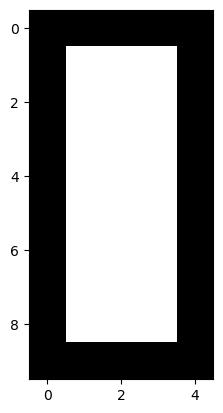

In [20]:
picture = generate_border_picture(width=5, height=10, border_width=1)
plot_picture(picture)

## Informationsmanipulation

Wir haben bereits jetzt ein neues Bildformat geschaffen und ein kleines Programm, welches unser Format interpretieren und als Rasterbild anzeigt.
In anderen Worten, unsere erdachte [Interpretation](sec-interpretation) wurde realisiert.

Jetzt können wir uns austoben und weitere Bilder generieren.
Wie wäre es zum Beispiel mit einem Kreis, Rechteck oder Dreieck?
Diese Objekte direkt als Ansammlung von Pixeln zu beschreiben ist schwierig und unflexibel.

Was uns das Leben deutlich leichter macht, ist die Einführung einer weiteren Interpretation.
Diese soll uns in eine **abstraktere** Welt ka­ta­pul­tie­ren.
In anderen Worten: Wir konstruieren eine Interpretation die geometrische (mathematische) Objekten wie den Kreis, ein Rechteck oder Dreieck (Repräsentanten) in eine zweidimensionale Liste aus 0 und 1 (Bedeutung) übersetzt.
Diese Übersetzung bezeichnet man auch als **Rasterisierung** (siehe Abschnitt [Vektorgrafiken](svg-image)).

```{figure} ../../figs/image-representation/point-to-pixel.png
---
height: 350px
name: fig-point-to-pixel
---
```

Unsere geometrischen Objekte haben reelle Koordinaten z.B. können wir einen Kreis durch seinen Mittelpunkt $c = (x,y)$ und Radius $r$ eindeutig beschreiben.
Um die Koordinaten in Pixelkoordinaten zu transformieren legen wir auf das Rasterbild ein reelles Koordinatensystem. 
Hat unser Bild $n \times n$ Pixelbild und wir möchten den Raum $10 \times 10 \subset \mathbb{R}^2$ durch das Bild abbilden, entspricht die erste Bildzeile dem Raum $10 \times 1$.

Um keine Verzerrung zu erhalten sollten Pixel in $x$ und in $y$ Richtung gleich viel Anteil des Euklidischen Raumes überziehen.
Die Auflösung ``resolution`` gibt an wie viel Raum ein Pixel repräsentiert.
Bei einer ``resolution = 0.1`` repräsentiert ein Pixel den Raum $0.1 \times 0.1$.
Anders ausgedrückt, braucht es $10 \times 10$ Pixel um den Raum $1 \times 1$ im $\mathbb{R}^2$ zu repräsentieren.

Kennen wir die ``resolution``, die Anzahl der Pixel in $x$-Richtung ``cols``, die Anzahl der Pixel in $y$-Richtung ``rows`` und gehen davon aus, dass der Raum $R$ den wir Abbilden möchten in $(0,0)$ beginnt und nur positive Werte enthält, also $R = [0;w] \times [0;h]$, dann können wir für einen gegebenen Punkt $p = (x,y) \in \mathbb{R}^2$ den Pixel $(i,j) \in \mathbb{N}^2$ berechnen der $p$ enthält.

```{exercise} Pixel berechnen
Schreiben Sie eine Funktion ``to_pixel(p, resolution)`` die Ihnen den Pixel ``(i,j)`` zurückgibt der den Punkt ``p = (x,y)`` enthält.
Bedenken Sie, dass die Indexierung der Pixel mit 0 beginnt.
```

In [21]:
def to_pixel(p, resolution):
    x, y = p
    return int(x / resolution), int(y/ resolution)

to_pixel((0.7, 0), 0.5)

(1, 0)

Soweit so gut!
Widmen wir uns nun dem Problem ein Rechteck bzw. Dreieck zu zeichnen.
Wir wenden die **Mustererkennung** an und bemerken, dass sowohl das Dreieck als auch das Rechteck aus Segmenten besteht (drei für das Dreieck und 4 für das Rechteck).
Deshalb können wir das Problem in das Zeichnen mehrere Segmente **zerteilen**.

Ein Segment können wir durch zwei Punkte $p_1 = (x_1, y_1)$ und $p_2 = (x_2, y_2)$ definieren.
Wir könnten aus den Punkten die Geradengleichung $f(x) = mx + t$ berechnen und diese 'abfahren'.
Hier würden wir jedoch auf unangenehme Sonderfälle stoßen.
Zum Beispiel, lässt sich ein Segment was parallel zur $y$-Achse verläuft nicht durch eine Funktion beschreiben.

```{figure} ../../figs/image-representation/midpoint.png
---
width: 300px
name: fig-midpoint
---
```

Was sagt uns folgende Beobachtung:
Ist $p_1, p_2$ gegeben dann ist der Mittelpunkt $m_1 = ((x_1 + x_2)/2, (y_1 + y_2)/2)$ Teil des Segments.
Außerdem erhalten wir neue Segmente $(p_1,m_1)$ und $(m_1,p_2)$.
Wir können dies mit den beiden neuen Segmenten wiederholen und erhalten vier neue Segmente.
Diesen Vorgang können wir solange fortsetzen, bis ein Segment komplett in einem Pixel enthalten ist und eine weitere Verfeinerung keine Wirkung mehr erzeugt.

Wir können diesen Vorgang [rekursiv](sec-recursion) realisieren.
Das heißt die Funktion, welche den Mittelpunkt berechnet, wird innerhalb dieser Funktion erneut aufgerufen.
Das kann endlos so weiter gehen und wir müssen uns eine **Abbruchbedingung** überlegen.

```{exercise} Mittelpunkt berechnen
Schreiben Sie eine Funktion ``midpoint(p1, p2)`` die Ihnen den Mittelpunkt ``(mx,my)`` des Segments ``(p1=(x1,y1), p2=(x2, y2))`` zurückgibt.
```

In [22]:
def midpoint(p1, p2):
    return (p1[0]+p2[0])/2, (p1[1]+p2[1])/2

midpoint((0,0),(3,3))

(1.5, 1.5)

````{exercise} Länge berechnen
Schreiben Sie eine Funktion ``distance(p1,p2)``, die Ihnen die Länge des Segments ``(p1=(x1,y1), p2=(x2, y2))`` zurückgibt.

**Tipp:** Sie können die Funktion ``sqrt`` der ``numpy`` Bibliothek verwenden, d.h.

```python
import numpy as np
...
np.sqrt(...)
...
```

````

``distance()`` können wir als Abbruchbedingung der Rekursion verwenden.
Ist ``distance(p1,p2) <= resolution`` macht es keinen großen Sinn mehr das Segment ``(p1,p2)`` weiter zu verkleinern. 

```{exercise} Segmentpunkte erzeugen
Schreiben Sie eine Funktion ``line(p1, p2, resolution)``, die Ihnen Punkte des Segments ``(p1,p2)`` erzeugt und als Liste zurückgibt.
```

In [23]:
import numpy as np
def distance(p1, p2):
    return np.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

def split(p1, p2, resolution, points):
    if distance(p1,p2) <= resolution:
        return points
    m1 = midpoint(p1, p2)
    points.append(m1)
    split(p1,m1,resolution,points)
    split(m1,p2,resolution,points)
    return points

def line(p1, p2, resolution):
    points = []
    split(p1, p2, resolution, points)
    return points
line((0,0),(3,0),0.1)

[(1.5, 0.0),
 (0.75, 0.0),
 (0.375, 0.0),
 (0.1875, 0.0),
 (0.09375, 0.0),
 (0.28125, 0.0),
 (0.5625, 0.0),
 (0.46875, 0.0),
 (0.65625, 0.0),
 (1.125, 0.0),
 (0.9375, 0.0),
 (0.84375, 0.0),
 (1.03125, 0.0),
 (1.3125, 0.0),
 (1.21875, 0.0),
 (1.40625, 0.0),
 (2.25, 0.0),
 (1.875, 0.0),
 (1.6875, 0.0),
 (1.59375, 0.0),
 (1.78125, 0.0),
 (2.0625, 0.0),
 (1.96875, 0.0),
 (2.15625, 0.0),
 (2.625, 0.0),
 (2.4375, 0.0),
 (2.34375, 0.0),
 (2.53125, 0.0),
 (2.8125, 0.0),
 (2.71875, 0.0),
 (2.90625, 0.0)]

Mit ``line`` können wir Punkte eines Segments erzeugen und durch ``to_pixel`` können wir diese Punkte in Pixel umwandeln.
Lassen Sie uns ein Bild einer Geraden zeichnen:

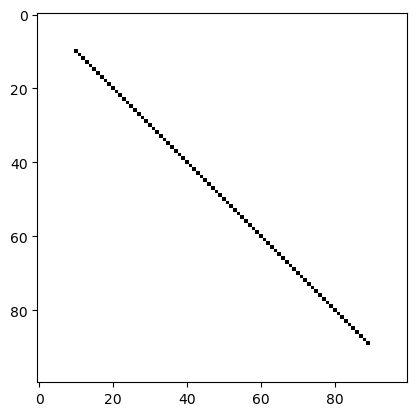

In [24]:
resolution = 0.1
picture = generate_border_picture(width=100, height=100, border_width=0)
points = line((1,1), (9,9), resolution)
pixels = list(map(lambda point: to_pixel(point, resolution), points))
for pixel in pixels:
    picture[pixel[1]][pixel[0]] = 0
    
plot_picture(picture)

Das sieht schon recht gut aus.
Da der Pixel ``picture[0][0]`` rechts oben ist, ist unser Koordinatensystem an der $x$-Achse gespiegelt und nach oben verschoben, was wir vernachlässigen können.

```{exercise} Linie zeichnen
Schreiben Sie eine Funktion ``draw_line(picture, p1, p2, resolution)``, die das Segment ``(p1,p2)`` in das Bild ``picture`` hinein zeichnen.
Behandeln Sie auch den Fall, dass das Segment nicht in das Bild passt (es soll dann kein Fehler erscheinen, sondern der Teil der nicht hinein passt wird abgeschnitten).
```

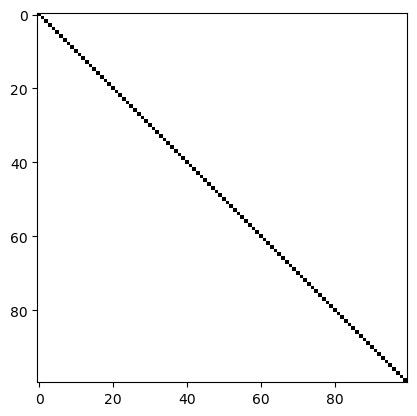

In [25]:
def contains_pixel(picture, pixel):
    return pixel[0] >= 0 and pixel[0] < len(picture) and pixel[1] >= 0 and pixel[1] < len(picture[0])

def draw_line(picture, p1, p2, resolution):
    points= line(p1, p2, resolution)
    pixels = list(map(lambda point: to_pixel(point, resolution), points))
    for pixel in pixels:
        if contains_pixel(picture, pixel):
            picture[pixel[1]][pixel[0]] = 0

resolution = 0.1
picture = generate_border_picture(width=100, height=100, border_width=0)
draw_line(picture, (-1,-1), (11,11), resolution)
plot_picture(picture)

Jetzt haben wir alle Teilprobleme gelöst und können das Dreieck bzw. Rechteck zeichnen.

```{exercise} Dreieck zeichnen
Schreiben Sie eine Funktion ``draw_triangle(picture, p1, p2, p3, resolution)`` die das Dreieck ``(p1,p2,p3)`` in das Bild ``picture`` hinein zeichnet.
```

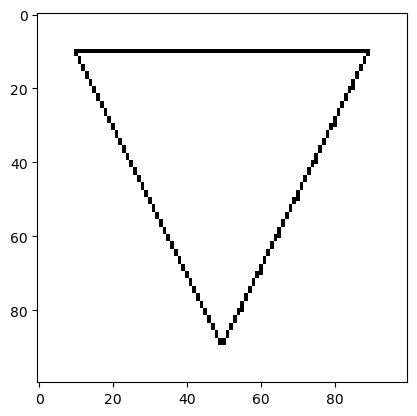

In [26]:
def draw_triangle(picture, p1, p2, p3, resolution):
    draw_line(picture, p1, p2, resolution)
    draw_line(picture, p2, p3, resolution)
    draw_line(picture, p3, p1, resolution)
    
resolution = 0.1
picture = generate_border_picture(width=100, height=100, border_width=0)
draw_triangle(picture, (1,1), (5,9), (9,1), resolution)
plot_picture(picture)

```{exercise} Rechteck zeichnen
Schreiben Sie eine Funktion ``draw_rectangle(picture, p1, p2, p3, p4, resolution)`` die das Rechteck ``(p1,p2,p3,p4)`` in das Bild ``picture`` hinein zeichnet.
```

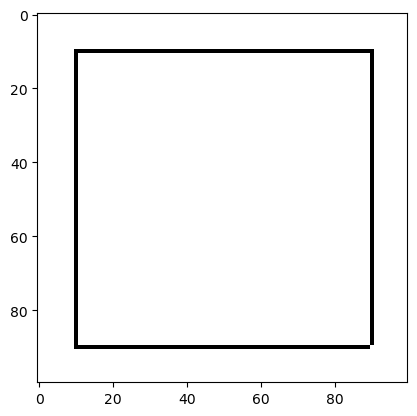

In [27]:
def draw_rectangle(picture, p1, p2, p3, p4, resolution):
    draw_line(picture, p1, p2, resolution)
    draw_line(picture, p2, p3, resolution)
    draw_line(picture, p3, p4, resolution)
    draw_line(picture, p4, p1, resolution)
    
resolution = 0.1
picture = generate_border_picture(width=100, height=100, border_width=0)
draw_rectangle(picture, (1,1), (1,9), (9,9), (9,1), resolution)
plot_picture(picture)

Wenn wir uns die beiden Funktionen ``draw_triangle`` und ``draw_rectangle`` genauer ansehen und unsere **Mustererkennung** aktivieren, könnte uns etwas auffallen?
Die Funktionen gleichen sich!
Beide zeichnen eine Sequenz/Liste von zusammenhängenden Segmenten oder anders gesagt: Beide zeichnen ein Polygon!

```{exercise} Polygon zeichnen
Schreiben Sie eine Funktion ``draw_polygon(picture, polygon, resolution)`` die das Polygon ``polygon = (p1,p2,p3,p4,p5,...)`` in das Bild ``picture`` hinein zeichnet.
``polygon`` kann eine Liste oder Tupel aus Punkten sein.

**Annahme:** Gehen Sie davon aus, dass die Reihenfolge der Punkte korrekt ist.
```

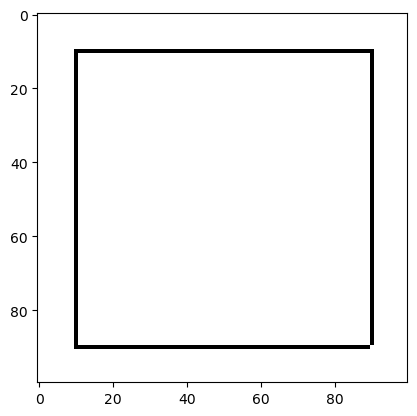

In [28]:
def draw_polygon(picture, polygon, resolution):
    for i in range(len(polygon)):
        draw_line(picture, polygon[i-1], polygon[i], resolution)
    
resolution = 0.1
picture = generate_border_picture(width=100, height=100, border_width=0)
draw_polygon(picture, ((1,1), (1,9), (9,9), (9,1)), resolution)
plot_picture(picture)

Dreieck, Rechteck und Polygon hätten wir geschafft.
Für den Kreis $K$ müssen wir zurück in unsere **abstrakte** Welt der geometrischen Objekte, denn einen Kreis mit lauter Segmenten darzustellen, ist möglich aber umständlich.
Wir müsten erst ein Poylgon mit sehr vielen Segmenten berechnen.

Die Punkte eines Kreises lassen sich durch eine *Kurve* beschreiben.
Sei der Kreis durch seinen Mittelpunkt $m = (x_m, y_m)$ und den radius $r$ beschrieben dann sind

$$K = \{(x_m + \cos(t) \cdot r, y_m + \sin(t) \cdot r) : t \in [0;2\pi]\}$$

die Punkte des Kreises bzw. der Kreis selbst.
Um den Kreis zu zeichnen unterteilen wir einfach das Intervall $[0;2\pi]$ in $n$ Teile und erhalten so $n$ Punkte.
Wir könnten z.B. $n$ so wählen dass $2\pi / n <$ ``resolution`` ist. 

```{exercise} Kreis zeichnen
Schreiben Sie eine Funktion ``draw_circle(picture, circle, resolution)``, die den Kreis ``circle = (m=(x,y), r)`` in das Bild ``picture`` hinein zeichnet.
Sie können erneut ``numpy`` verwenden, d.h. ``np.sin()``, ``np.cos()``, ``np.pi`` und (optional) ``np.linspace()``.
```

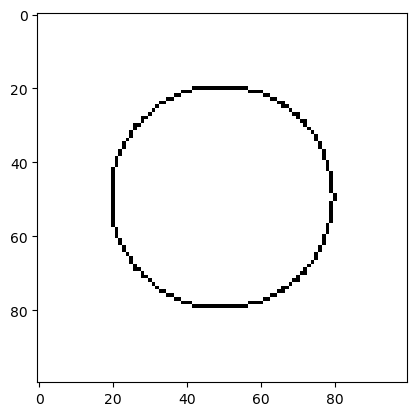

In [29]:
import numpy as np
def draw_circle(picture, circle, resolution):
    center = circle[0]
    radius = circle[1]
    n = int(6 * np.pi / resolution)
    t = np.linspace(start=0.0, stop=2 * np.pi, num=n)
    for dt in t:
        x = center[0] + np.cos(dt) * radius
        y = center[1] + np.sin(dt) * radius
        pixel = to_pixel((x, y), resolution)
        if contains_pixel(picture, pixel):
            picture[pixel[1]][pixel[0]] = 0
    
resolution = 0.1
picture = generate_border_picture(width=100, height=100, border_width=0)
draw_circle(picture, ((5,5), 3), resolution)
plot_picture(picture)

Im Falle des Kreises beschreibt 

$$k(t) = (x_m + \cos(t) \cdot r, y_m + \sin(t) \cdot r)$$

die *Kurve* des Kreises.
Wir können aber auch andere *Kurven* wie zum Beispiel die Funktion $f(x) = x^2$ durch die *Kurve* $k(t) = (t, f(t))$ zeichnen.
Durch wie viele Punkte die Funktion noch gut erkennbar ist, ist jedoch im allgemeinen nicht so einfach zu schätzen.


```{exercise} (mathematische) Funktion zeichnen
Suchen Sie sich irgendeine geeignete Funktion aus und zeichnen Sie diese in einem geeigneten Intervall.
```

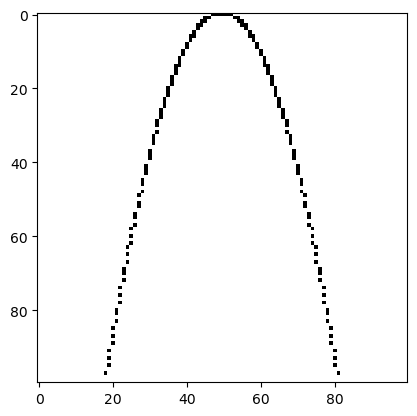

In [30]:
import numpy as np
def draw_function(picture, f, start, stop, resolution):
    n = int(3 * (stop - start) / resolution)
    t = np.linspace(start=start, stop=stop, num=n)
    for dt in t:
        pixel = to_pixel((dt, f(dt)), resolution)
        if contains_pixel(picture, pixel):
            picture[pixel[1]][pixel[0]] = 0
            
resolution = 0.1
picture = generate_border_picture(width=100, height=100, border_width=0)
draw_function(picture, lambda t: (t-5)**2, 1, 9, resolution)
plot_picture(picture)

## Daumenkino

Die folgende Methode (ein [Interpreter](def-interpreter)) erwartet eine Liste von Bilder (in Ihrem Format) und generiert daraus eine Animation (eine Folge von Plots).
Falls Sie den Parameter ``save`` auf ``True`` setzen, wird ein GIF (eine Bildfolge/Daumenkino/Minivideo) erzeugt und in der Datei ``'binary-drawing.gif'`` abgespeichert.

In [31]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import animation, rc
from IPython.display import HTML, display
from IPython.display import HTML

def animate(pictures, interval = 100, save = False, title = '', dpi = 80):
    cmap='gray'
    vmin = 0
    vmax = 1
    fig, ax = plt.subplots()
    plt.title(title)
    im = plt.imshow(pictures[0], animated=True, cmap = cmap, vmin = vmin, vmax = vmax)
    i = {'index': 0} # trick to enforce sideeffect
    def updatefig(*args):
        i['index'] += 1
        if i['index'] == len(pictures):
            i['index'] = 0
        im.set_array(pictures[i['index']])
        return im, 
    ani = animation.FuncAnimation(fig, updatefig, interval=interval, blit=True, save_count=len(pictures))
    if save:
        ani.save('binary-drawing.gif', dpi=dpi, writer="imagemagick")
    plt.close()
    return ani

````{exercise} Einfaches Daumenkino
Generieren Sie folgendes GIF/Daumenkino bzw. Animation:

```{figure} ../../figs/image-representation/daumenkino.gif
---
height: 150px
name: fig-daumenkino
---
```

**Tipp:** Sie benötigen lediglich mehrere Aufrufe von ``generate_border_picture()``.
````

In [32]:
size = 20
increase = [generate_border_picture(width=size, height=size, border_width=i) for i in range(size//2)]
decrease = [generate_border_picture(width=size, height=size, border_width=(size//2)-i) for i in range((size//2)-1)]
border_pictures = increase + decrease
ani = animate(border_pictures, save=True)
HTML(ani.to_jshtml())

MovieWriter imagemagick unavailable; using Pillow instead.


Fassen wir noch einmal kurz zusammen was wir bis jetzt geschafft haben:
Wir haben uns ein Format / eine [Interpretation](sec-interpretation) für ein Schwarz-Weiß-Bild ausgedacht und umgesetzt.
Mit ein wenig Hilfe durch externer Module, konnten wir unser Rasterbild anzeigen.
Wir haben Algorithmen implementiert die uns Polygone (inkl. Dreiecke und Rechtecke), Kreise und sogar Funktionen zeichnen.
Und jetzt haben wir sogar die Möglichkeit aus einer Folge von Bildern ein kleines Video zu generieren.
Dieses Video ist wiederum nichts anderes als eine **Liste von Listen von Listen bestehend aus Nullen und Einsen**.
Ist das nicht ganz erstaunlich?

Wir haben jetzt die Möglichkeit eine unbegrenzte Menge an Animationen zu erzeugen, von bewegten geometrischen Objekten bis hin zum [Game Of Life](https://de.wikipedia.org/wiki/Conways_Spiel_des_Lebens) - Ihre Kreativität ist das Limit.

````{exercise} Simulation eines Partikels
Generieren Sie eine Animation eines Balls, welcher sich in einer Box bewegt, d.h. der Ball bewegt sich mit konstanter Geschwindigkeit und prallt von der Wand ab.

```{figure} ../../figs/image-representation/daumenkino_ball.gif
---
height: 150px
name: fig-daumenkino-ball
---
```

**Tipps:** Schreiben Sie erst eine Methode die einen *Kreis* ``circle = (m = (x,y), r)`` in einer Box fortbewegt und diese Bewegung als Liste von Kreisen zurückgibt.
Anschließend können Sie mit ``draw_circle()`` diese Liste in eine Liste von Bildern umwandeln. Bedenken Sie, dass sie für jeden Kreis ein neues Bild durch ``generate_border_picture()`` generieren müssen. 
````

In [33]:
def generate_ball_box(width, height, circle, resolution):
    w = int(width/resolution)
    h = int(height/resolution)
    picture = generate_border_picture(width=w, height=h, border_width=1)
    ball = draw_circle(picture, circle, resolution)
    return picture

def animate_ball(nframes):
    resolution = 0.1
    box_width = 10
    box_height = 10
    x = 5
    y = 5
    radius = 1
    velocity = [0.1,0.3]
    
    animation = []
    time = 1
    for i in range(nframes):
        # collision detection
        if x - radius <= 0 or x + radius >= box_width:
            velocity[0] = -velocity[0]
        if y - radius <= 0 or y + radius >= box_height:
            velocity[1] = -velocity[1]
        
        x = x + velocity[0] * time
        y = y + velocity[1] * time
        circle = ((x,y),radius)
        animation.append(generate_ball_box(box_width,box_height,circle,resolution))
    return animation

ani = animate(animate_ball(nframes=100), save=True)
HTML(ani.to_jshtml())

MovieWriter imagemagick unavailable; using Pillow instead.


```{exercise} Eigenes Daumenkino
Erzeugen Sie Ihr eigenes Daumenkino. Vielleicht ein bewegtes Dreieck oder eine fortlaufende Sinuswelle oder etwas ganz anderes?
```

## Fourier-Zeichnungen (optional)

Was nun folgt ist ein sich Austoben in der Welt die wir uns geschaffen haben.
Wir möchten Ihnen eine ganz bestimmte Zeichenmethode nicht vorenthalten.

Stellen Sie sich ein Blatt Papier vor.
Auf diesem zeichnen Sie einen Kreis $K_0$.
Anhand dieses Kreises zeichnen Sie einen weiteren Kreis $K_1$, sodass der Mittelpunkt von $K_1$, während Sie zeichnen, auf $K_0$ wandert.
Nachdem Sie fertig sind, löschen Sie $K_0$.

Ihr Ergebnis hängt davon ab, wie schnell sie auf $K_0$ wandern und wie schnell Sie $K_1$ zeichnen, d.h. das Ergebnis hängt von den Frequenzen und Radii ab.

Zeichnen Sie beide Kreise mit der gleichen Frequenz und starten Sie beide Kreise bei $y = 0$, so ist $K_1$ ein Kreis wobei dessen Radius die Summe der Radii der beiden Kreise ist.

Angenommen 

$$K_0(t) = (x_0 + \cos(\omega_0 \cdot t) \cdot r_0, y_0 + \sin(\omega_0 \cdot t) \cdot r_0)$$

und 

$$K_1(t) = (\cos(\omega_1 \cdot t) \cdot r_1, \sin(\omega_1 \cdot t) \cdot r_1)$$

dann gilt für ihre gezeichnete Kurve 

$$K(t) = K_0(t) + K_1(t)$$

Wir können das weiter verallgemeinern und von $n$ Kreisen ausgehen, dann gilt für ihre Zeichnung:

$$K(t) = \sum_{i=0}^{n-1} K_i(t)$$

````{exercise} Fourier-Zeichnungen
Schreiben Sie eine Funktion ``draw_circular(picture, center, frequencies, radii, resolution, start stop)``, die die oben beschriebene Zeichentechnik implementiert.
Dabei soll ``center`` gleich $(x_0, y_0)$, ``frequencies`` eine Liste die alle Frequenzen $\omega_0, \ldots \omega_{n-1}$ und ``radii`` eine Liste die alle Radii $r_0, \ldots, r_{n-1}$ enthält sein.
``start`` und ``stop`` sollen ihr (Zeichen-)Intervall definieren.

Als Motivation hier ein Beispiel:

```python
resolution = 0.1
picture = generate_border_picture(width=100, height=100, border_width=0)
draw_circular(picture, (5,5), [4,15], [3,0.7], resolution, 0.0, 2*np.pi)
plot_picture(picture)
```

ergibt

```{figure} ../../figs/image-representation/fourier-drawing.png
---
height: 150px
name: fig-fourier-drawing
---
```

````

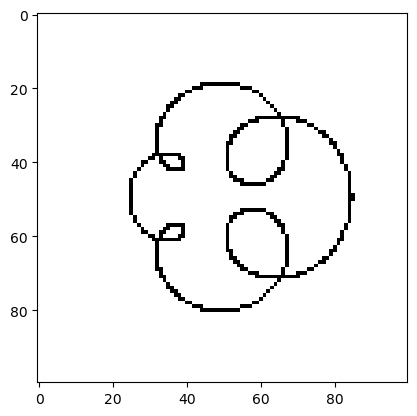

In [34]:
def draw_circular(picture, center, frequencies, radii, resolution, start=0.0, stop=2*np.pi):
    n = int(2*max(frequencies)*(stop-start) / resolution)
    t = np.linspace(start=start, stop=stop, num=n)
    for dt in t:
        x = center[0]
        y = center[1]
        
        for i in range(min(len(frequencies), len(radii))):
            radius = radii[i]
            frequency = frequencies[i]
            x = x + np.cos(frequency*dt) * radius
            y = y + np.sin(frequency*dt) * radius
        
        pixel = to_pixel((x, y), resolution)
        if contains_pixel(picture, pixel):
            picture[pixel[1]][pixel[0]] = 0
            
resolution = 0.1
picture = generate_border_picture(width=100, height=100, border_width=0)
draw_circular(picture, (5,5), [1,5,4], [2,1,0.5], resolution, 0.0, 2*np.pi)
plot_picture(picture)

Es ergeben sich interessante Fragen.
Zum Beispiel, mit welchen Argumenten erhalten Sie ein **harmonisches** (ein eher einfaches) Bild und warum?
Wann erhalten Sie hingegen ein komplexeres Gebilde?
Was hat das mit den **harmonischen** bzw. **unharmonischen** Schwingungen und einem **harmonischen** bzw. **unharmonischen** Ton zu tun?
Können wir durch unsere Zeichenmethode Ton zeichnen?
Welche Objekte können wir überhaupt mit dieser Methode zeichen, eine Gerade, ein Rechteck?

Falls Sie sich mehr mathematisches Wissen zu diesem Thema aneignen möchten, ist folgendes exzellentes Video von **Grant Sanderson** ein wunderbarer Einstieg.

<div style="display: block;margin-left: auto;margin-right: auto;width: 632px;">
<iframe width="632" height="276" src="https://www.youtube.com/embed/r6sGWTCMz2k" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</div>